In [10]:
import pandas as pd
from ml import preprocess
from importlib import reload
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reload(preprocess)

INPUT_FEATURES = [
    "return_1m",
    "avg_daily_return",
    "stddev_return",
    "return_1m_lag1",
    "return_1m_lag2",
    "return_1m_lag3",
    "return_1m_lag4",
    "return_1m_lag5",
    "return_1m_lag6",
    "return_1m_lag7",
    "return_1m_lag8",
    "return_1m_lag9",
    "return_1m_lag10",
    "return_1m_lag11",
    "return_1m_lag12",
]
LABEL = ["return_1m_forward"]
SIMPLE_PREDICTION = ["return_r24m"]
DUMMYS = [
    "ticker_dec_3",
    "ticker_dec_4",
    "ticker_dec_5",
    "ticker_dec_6",
    "ticker_dec_7",
    "ticker_dec_8",
    "ticker_dec_9",
    "ticker_hi_10",
    "ticker_lo_10",
]

TRAINING_YEARS = 20
START_YEAR = 2000
END_YEAR = 2012

In [11]:
df = pd.read_csv("../data/clean/Portfolios_Formed_on_ME_daily.csv")
df = preprocess.daily_to_monthly(df)
df = preprocess.add_lags(df)
df = preprocess.add_label(df)
df = preprocess.add_simple_prediction(df)
df = preprocess.add_dummy_variables(df, ["ticker"])

In [12]:
results = []

for year in range(START_YEAR, END_YEAR + 1):
    TRAINING_START = f"{year - TRAINING_YEARS}-01-31"
    TRAINING_END = f"{year - 1}-12-31"
    TEST_START = f"{year}-01-31"
    TEST_END = f"{year}-12-31"

    # Filter the data for the training period
    dff = df.loc[TRAINING_START:TRAINING_END].dropna()
    X = dff[INPUT_FEATURES + DUMMYS]
    y = dff[LABEL]

    # Train the model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y.values.ravel())

    # Filter the data for the test period
    test = df.loc[TEST_START:test_end]
    y_pred_z = rf.predict(test[INPUT_FEATURES + DUMMYS])
    y_actual = test[LABEL]
    y_simple_pred_z = test[SIMPLE_PREDICTION]

    # Calculate Mean Squared Error for predictions
    mse_rf = mean_squared_error(y_actual, y_pred_z)
    mse_simple = mean_squared_error(y_actual, y_simple_pred_z)

    # Store results
    results.append(
        {
            "year": year,
            "mse_rf": mse_rf,
            "mse_simple": mse_simple,
        }
    )

    print(f"Year: {year}")
    print(f"Mean Squared Error (RF): {mse_rf}")
    print(f"Mean Squared Error (Simple): {mse_simple}")

results_df = pd.DataFrame(results)

Year: 2000
Mean Squared Error (RF): 0.007070990392154223
Mean Squared Error (Simple): 0.007826658062175106
Year: 2001
Mean Squared Error (RF): 0.005591709699548211
Mean Squared Error (Simple): 0.00462151223678867
Year: 2002
Mean Squared Error (RF): 0.005523184607912163
Mean Squared Error (Simple): 0.004243497132294155
Year: 2003
Mean Squared Error (RF): 0.0036262050290953324
Mean Squared Error (Simple): 0.002815531679052659
Year: 2004
Mean Squared Error (RF): 0.001428023602353583
Mean Squared Error (Simple): 0.0015778449039521474
Year: 2005
Mean Squared Error (RF): 0.0016734692765780124
Mean Squared Error (Simple): 0.001642218757539872
Year: 2006
Mean Squared Error (RF): 0.0011238227391418374
Mean Squared Error (Simple): 0.0007668225673857762
Year: 2007
Mean Squared Error (RF): 0.0021937537597467973
Mean Squared Error (Simple): 0.0015252567203426254
Year: 2008
Mean Squared Error (RF): 0.009359891681197793
Mean Squared Error (Simple): 0.0070756033047479055
Year: 2009
Mean Squared Error 

<Axes: xlabel='year'>

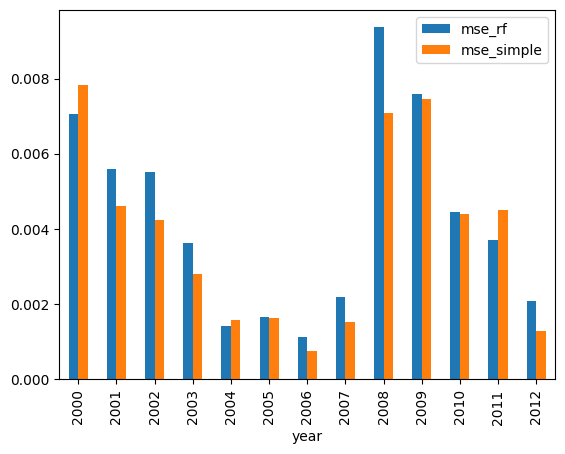

In [13]:
results_df.set_index("year").plot(kind="bar")